# Deep Learning et traitement du signal TP 1 

Listez les noms des étudiants (3 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom, affectation).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb 

Installez les paquets nécessaires à la réalisation de ce TP
<br> 
Vous pouvez utiliser dans le notebook 
!pip install \<nom_du_paquet\>
    


## Imports


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy
import librosa 
import librosa.display
import IPython.display as ipd

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Partie 1: Audio 

### Visualisation

 *Enregistrez un fichier wav de quelques secondes de votre voix. 
  <br>
 Importez le avec librosa.open et écoutez le dans le notebook avec IPython.display.Audio*


In [ ]:
signal, sample_rate = librosa.load('/content/drive/MyDrive/MVA/Traitement de signal/TP/TP1/coloniedefourmies.wav')
ipd.Audio(signal ,rate=sample_rate) 

*Visualisez la forme d'onde temporelle de ce signal audio. <br>
Estimez et affichez sa Densité Spectrale de Puissance. <br>
Donnez une interprétation de ce que vous observez.*
 

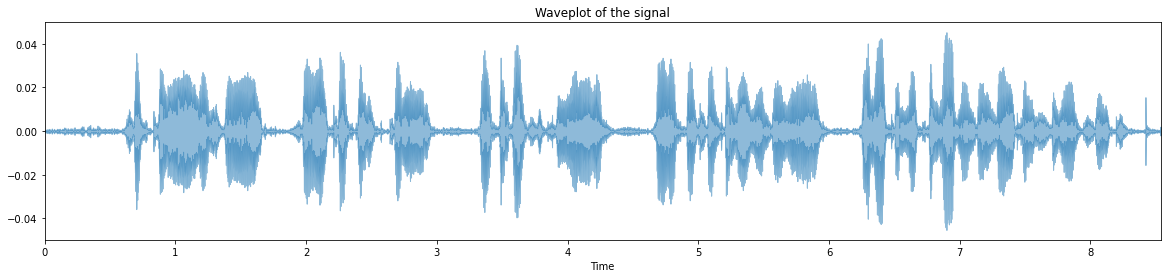

In [ ]:
#Waveplot
plt.figure(figsize=(20, 4))
librosa.display.waveplot(signal, sr=sample_rate,alpha=0.5)
plt.title('Waveplot of the signal')
plt.show()

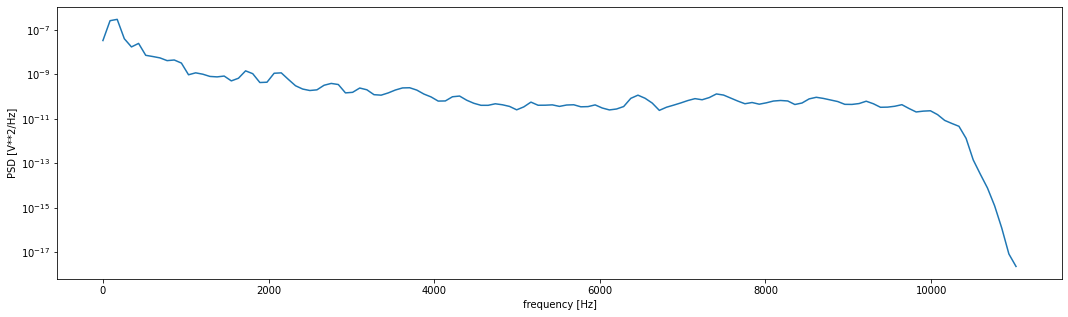

In [ ]:
#Spectral density
from scipy.signal import welch

plt.figure(figsize=(18, 5))
f, Pxx_den = welch(signal,sample_rate)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()




1.   First we notice that the spectral density decreaces after 11kHW which is in correation with the interval of vocal signal's support interval [50HW,22KHz]
2.   The maximum of the density is under 3khz
3. We notice that the distribution is over an interval since the signal support multiple frequences 







In [ ]:
# derive spectrum using FT
ft = scipy.fft.fft(signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sample_rate, len(magnitude)) 

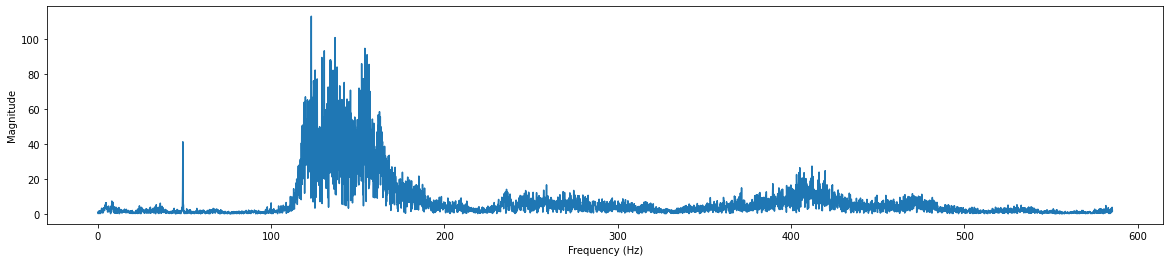

In [ ]:
# plot spectrum
plt.figure(figsize=(20, 4))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

*The spectral density represents the distribution of the energy through the frequences we notice that the distribution isn't uniform across the frequences showing the presence of noise*

*Calculez et affichez le spectrogramme du signal. <br>
Justifiez du choix des réglages que vous avez faits. <br>
Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.*

In [ ]:
def spectrogram_signal(signal, sample_rate):
  fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 8),sharex=True)
  #Linear-frequency spectrogram 
  D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
  img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sample_rate, ax=ax[0])
  ax[0].set(title='Linear-frequency power spectrogram')
  ax[0].label_outer()

  #log-frequency spetrogram
  hop_length = 1024
  D = librosa.amplitude_to_db(np.abs(librosa.stft(signal, hop_length=hop_length)),ref=np.max)
  librosa.display.specshow(D, y_axis='log', sr=sample_rate, hop_length=hop_length,x_axis='time', ax=ax[1])
  ax[1].set(title='Log-frequency power spectrogram')
  ax[1].label_outer()
  fig.colorbar(img, ax=ax, format="%+2.f dB")

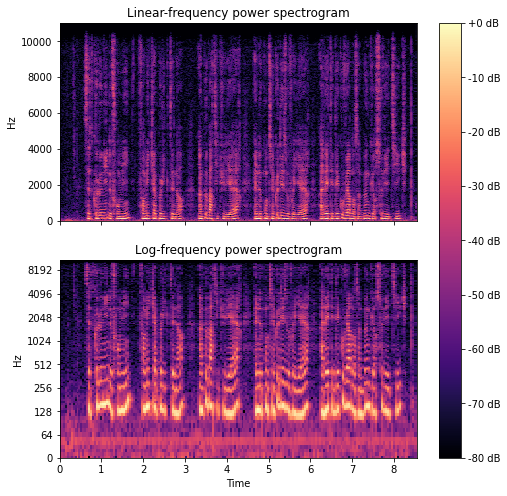

In [ ]:
spectrogram_signal(signal, sample_rate)

Visually we can detect the pitch in the spectrogram through the high energy band between 90Hz and 200HZ. We can write a function to do it on certain time slotes.

In [ ]:
def detect_pitch(y, sr, t):
  pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, fmin=60, fmax=500)
  index = magnitudes[:, t].argmax()
  pitch = pitches[index, t]
  return pitch

In [ ]:
detect_pitch(signal, sample_rate,100)

125.82182

This pitch is concistent with the range of human vocal pitch 

### Rééchantillonnage

Nous allons procéder de deux façons pour sous-échantillonner votre signal d'un facteur 2: 
- Supprimez un point sur deux: signal -> signal_reech_1
- Utilisez la fonction librosa.resample: signal -> signal_reech_2

Ecoutez les deux résultats dans le notebook et affichez le spectrogramme de (signal_reech_1 - signal) et (signal_reech_2 - signal). 

Les deux méthodes de rééchantillonnage sont elles équivalentes ? Interprétez les éventuelles différences

In [ ]:
#lecture du signal echantillonné
signal_reech_1=signal[::2]
ipd.Audio(signal_reech_1 ,rate=sample_rate//2) 

In [ ]:
#On reechantionne sur la frequence la plus grande 
signal_reech_1=librosa.resample(signal_reech_1, orig_sr=sample_rate//2, target_sr=sample_rate)
ipd.Audio(signal_reech_1 ,rate=sample_rate) 

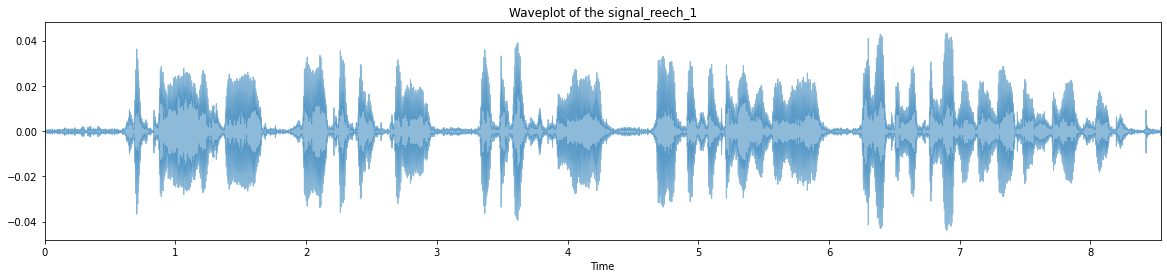

In [ ]:
#Waveplot
plt.figure(figsize=(20, 4))
librosa.display.waveplot(signal_reech_1, sr=sample_rate,alpha=0.5)
plt.title('Waveplot of the signal_reech_1')
plt.show()

In [ ]:
#deuxieme echantionnage 
signal_reech_2 = librosa.resample(signal, orig_sr=sample_rate, target_sr=sample_rate//2)
ipd.Audio(signal_reech_2 ,rate=sample_rate//2) 

In [ ]:
#On reechantionne sur la frequence la plus grande 
signal_reech_2=librosa.resample(signal_reech_2, orig_sr=sample_rate//2, target_sr=sample_rate)
ipd.Audio(signal_reech_2 ,rate=sample_rate) 

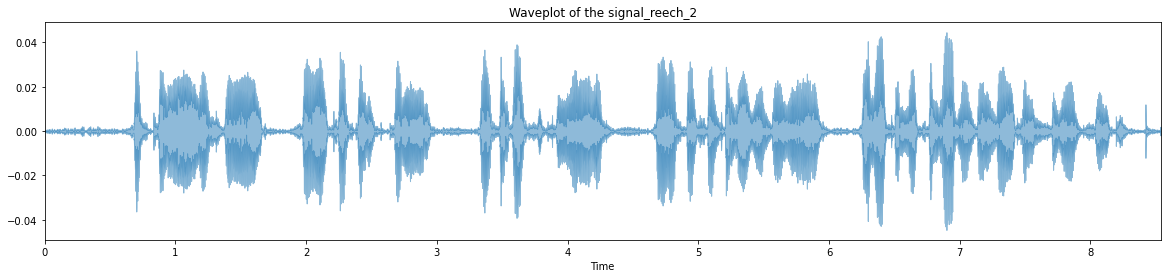

In [ ]:
#Waveplot
plt.figure(figsize=(20, 4))
librosa.display.waveplot(signal_reech_2, sr=sample_rate,alpha=0.5)
plt.title('Waveplot of the signal_reech_2')
plt.show()

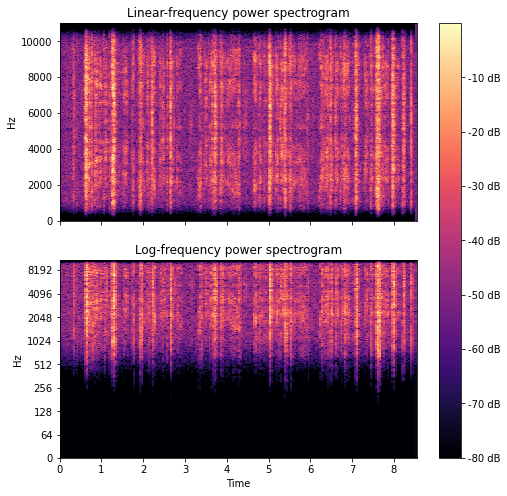

In [ ]:
spectrogram_signal(signal_reech_1-signal, sample_rate)

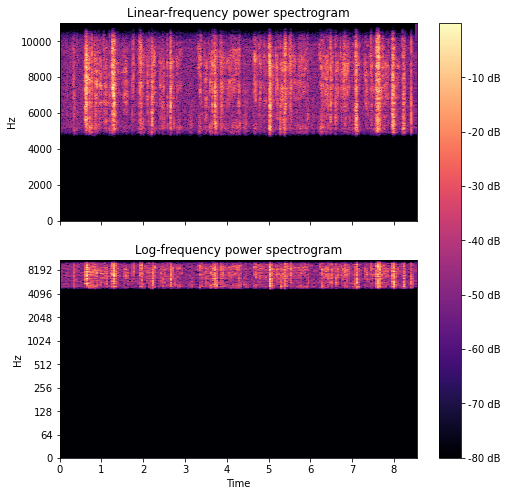

In [ ]:
spectrogram_signal(signal_reech_2 -signal , sample_rate)

On remarque que les spectrogrammes des deux signaux echantillonnés sont differents.

### Calcul du Pitch

Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix.

Utilisez cette méthode pour estimer les variations du Pitch le long du signal, estimez le pitch toutes les 20 ms et présentez vos résultats sous forme visuelle. 

Commentez.

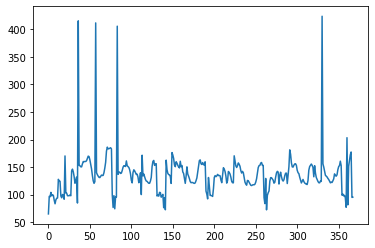

In [ ]:
pitches=[detect_pitch(signal, sample_rate, t) for t in range(368)]
plt.plot(pitches)

## Partie 2: Détection d'impulsion

Un signal de durée 1 seconde et échantillonné à 1000 Hz est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz. 

Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz. 
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient une tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichiez contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon. 



In [ ]:
donnees = np.load('/content/drive/MyDrive/MVA/Traitement de signal/TP/TP1/signaux_impulsions.npz')
signaux = donnees['data']
labels = donnees['labels']

Proposez une méthode (simple) pour décider si un signal contient une impulsion ou non. Cette méthode fera intervenir un seuil. 
Utilisez votre méthode sur tous les signaux pour prédire s'ils contiennent une impulsion ou non. 

Nous allons comparer vos résultats aux résultats idéaux consignés dans le tableau labels. 

Calculez le nombre de signaux pour lesquels votre résultat concorde avec le résultat idéal. 



La précision est définie comme (le nombre de signaux décidés positifs par votre méthode et qui sont effectivement positifs)/(le nombre de signaux décidés positifs par votre méthode)

et le rappel comme (le nombre de signaux décidés positifs par votre méthode et qui sont effectivement positifs)/(le nombre de signaux réellement positifs)

Faites varier le seuil et enregistrez pour ses différentes valeurs la précision et le rappel de votre méthode. Affichez dans le plan (précision , rappel) les points de fonctionnement de votre méthode. Commentez le résultat. 